### Hyper Parameter tunning

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import fetch_california_housing


In [2]:
param_grid = [
  {'poly__degree': [x for x in range(2, 10)]}
]
pipeline = Pipeline(steps=[
  ('poly', PolynomialFeatures()),
  ('sgd', SGDRegressor())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, 
                           scoring= 'neg_mean_squared_error', 
                           return_train_score= True)



In [3]:
california_housing = fetch_california_housing(as_frame= True)
type(california_housing)

sklearn.utils._bunch.Bunch

In [4]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Features note down of the dataset
* There are **20640** in the dataset.
* There are **8 numerical attributes** per example.
* The target label is median house value.
* There are **no missing values** in this dataset.

In [6]:
california_housing.data.shape

(20640, 8)

In [7]:
type(california_housing.data)

pandas.core.frame.DataFrame

In [8]:
california_housing.target.shape

(20640,)

In [9]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

features of the data

In [10]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


this is aggrigated data

In [11]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


target values

In [12]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [13]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Step: Feature and target histograms
creating histogram of given data using seaborn

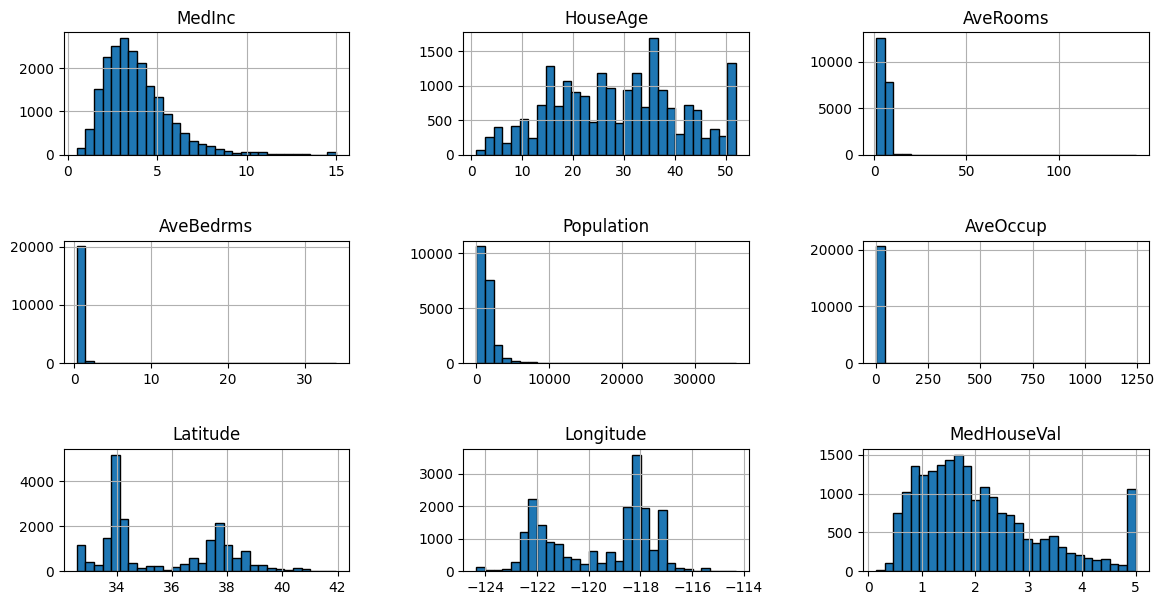

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(14, 7), bins= 30, edgecolor='black')
plt.subplots_adjust(hspace= 0.7, wspace= 0.4)

## Observation on the data
* **medInc** has a long  tail distribution - salary of people is more or less normally distributed with a few folks getting a high salary.
* **HouseAge** has more or less a uniform distribution.
* The range for features, **AveRooms, AveBedrms, AveOccups, Population,** is large and it contains a small number of large values (as there are unnoticable bins on the right in the histogram plots of these features). That would mean that there could be certain outlier values present in there features.
* **Latitude** and **Longitute** carry geographical information. Their combination helps us decide price of the house.
* **MedHouseVal** also has a long tail distribution. It spikes towards end. the reason is that the house with price more than 5k are given values of 5.

In [15]:
california_housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Step: PariPlot

/home/anni/BS/jupyterLab/jupitor_notebook/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


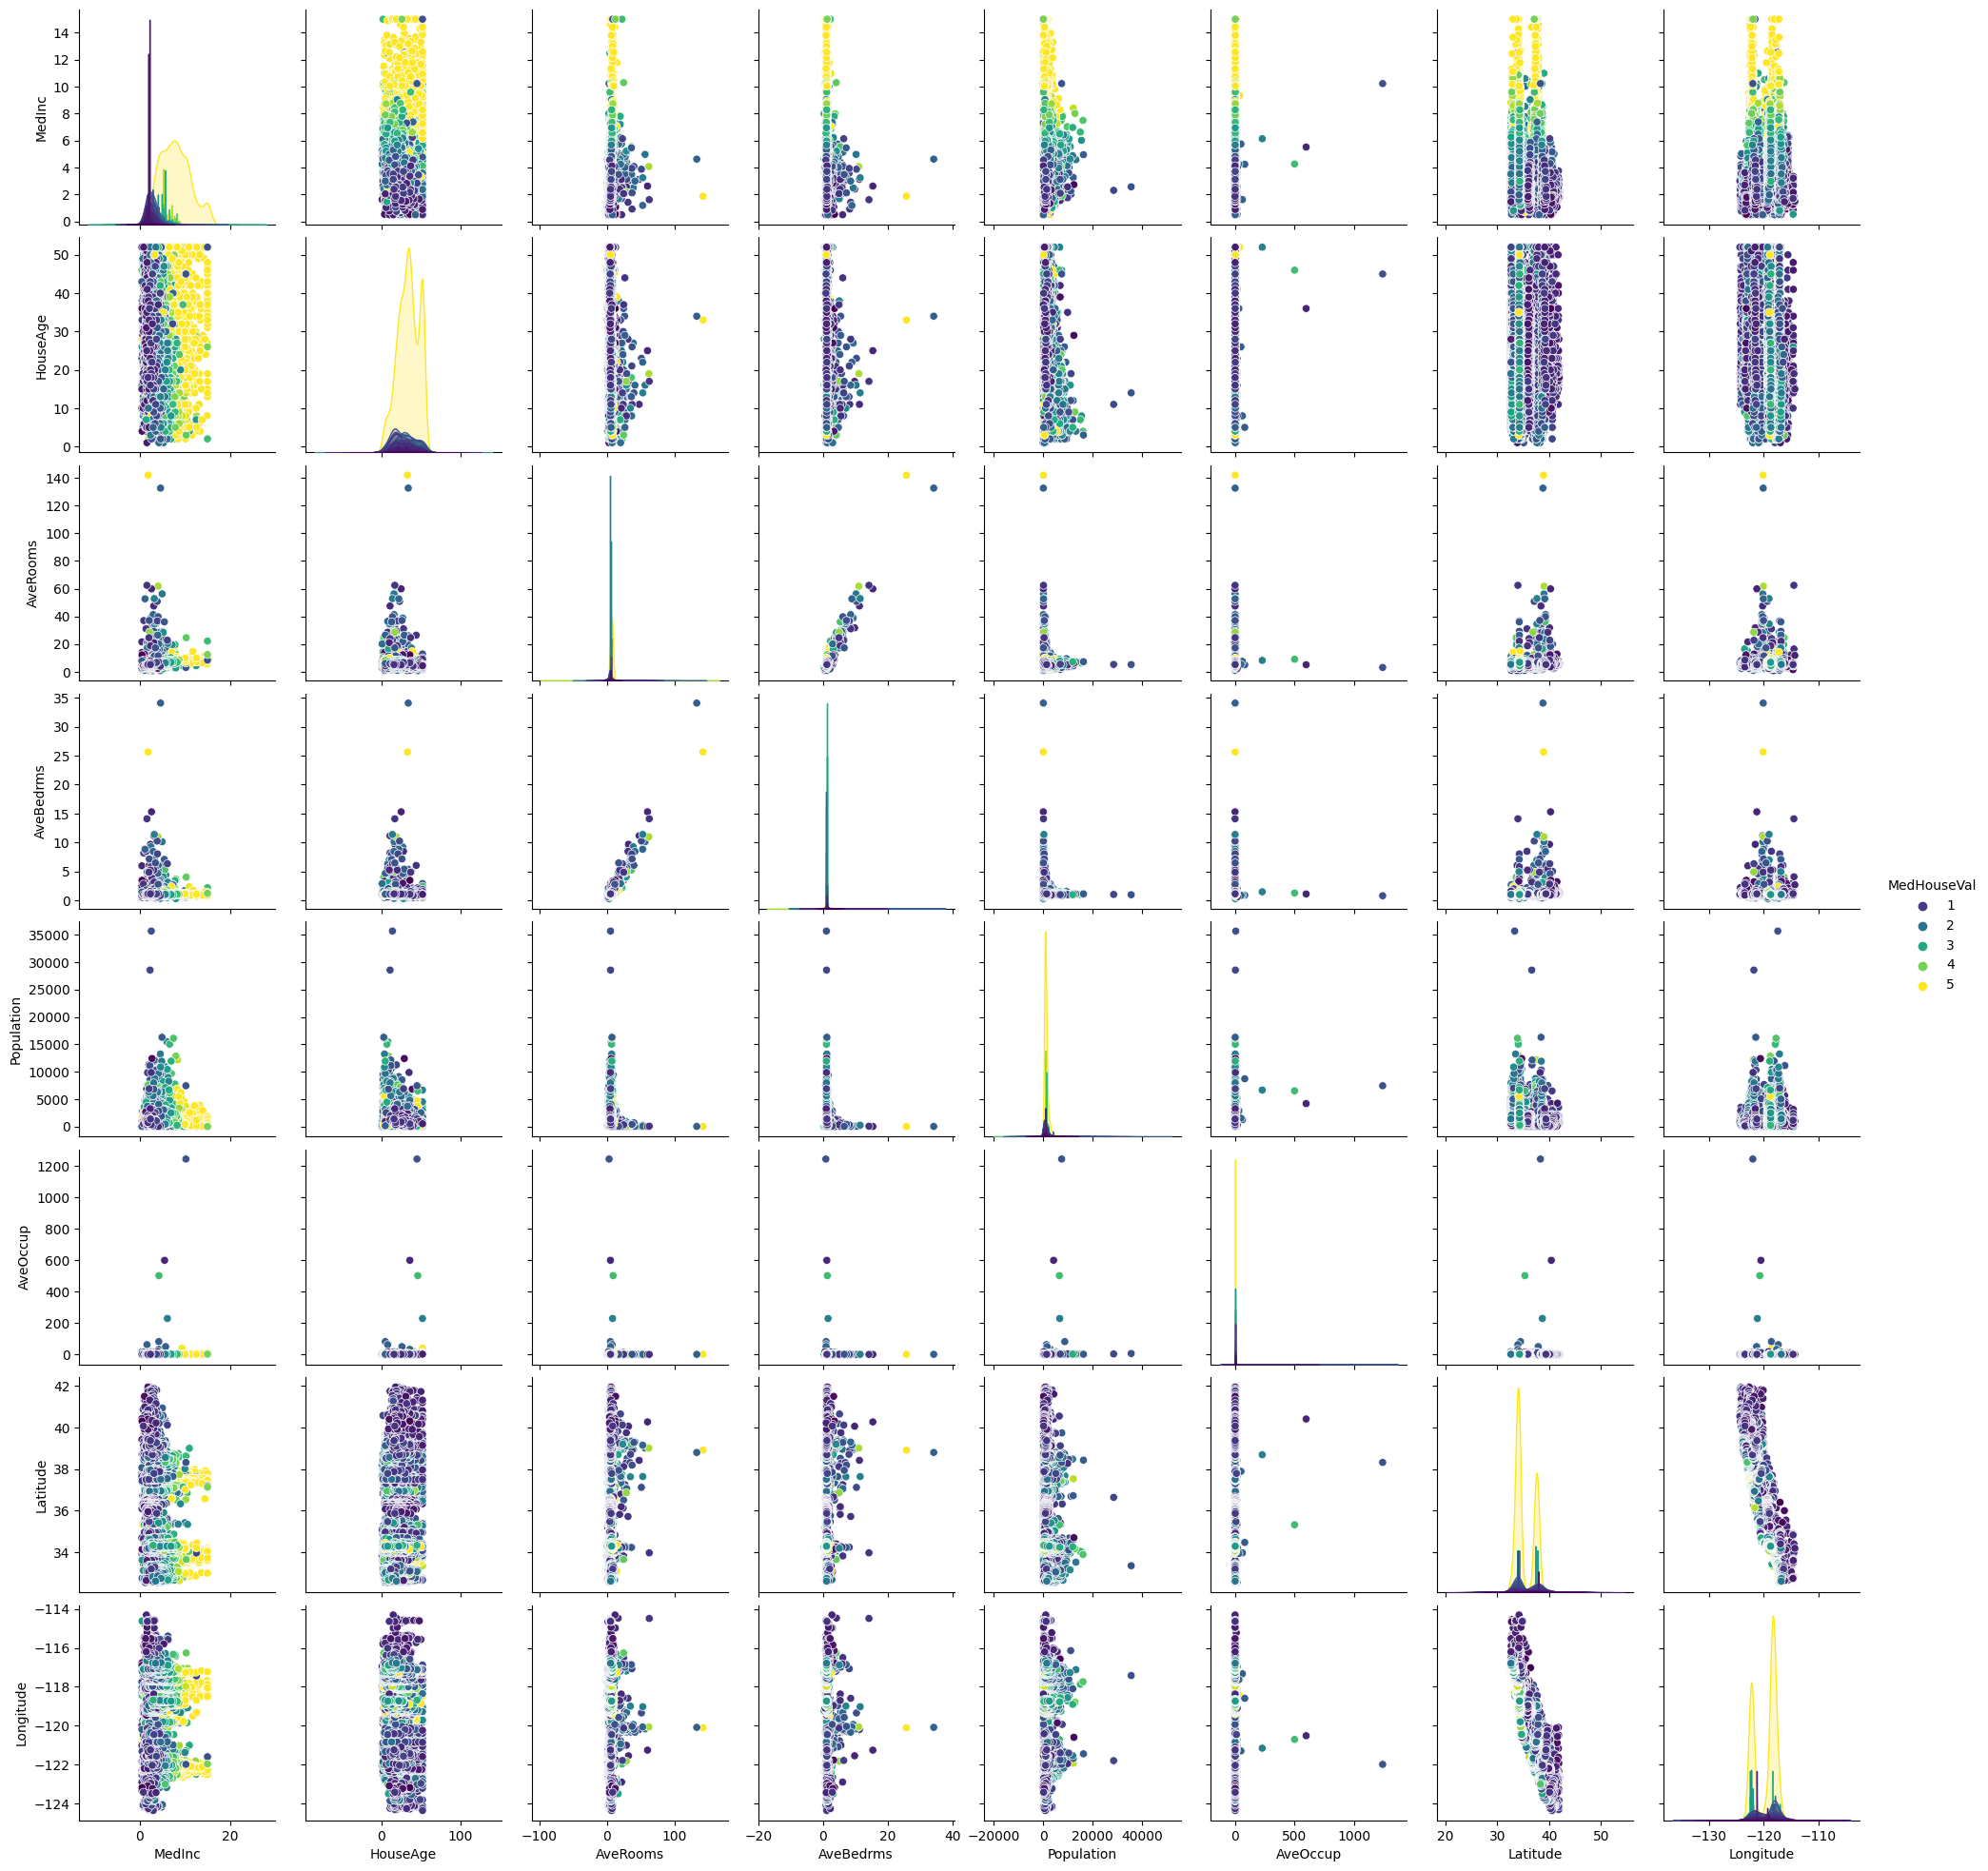

In [16]:
pair_plot = sns.pairplot(data=california_housing.frame, hue="MedHouseVal", palette="viridis")

#### Basic exploration complete